In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import functions



In [264]:
# calculate the % of the dfs and dfspot for each scenario 

def cut_dates(df):
    df['D'] = pd.to_datetime(df['D'])
    filtered_df = df[df['D'] > '1990-08-30']
    filtered_df = filtered_df[filtered_df['D'] < '2022-07-30']
    return filtered_df

# def create_unique_id_column(df):
#     df['elevation'] = df['elevation'].astype(int)
#     df['id'] = df['elevation'].astype(str) + "_" + df['D_month'].astype(str)
#     return df

def prepare_dfcount_for_plot(dfcount):
    melted = pd.melt(dfcount, id_vars=['D', 'D_year', 'D_month'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # create unique id for elevation and month for merging
    melted['elevation'] = melted['elevation'].astype(int)
    melted['id'] = melted['elevation'].astype(str) + "_" + melted['D_month'].astype(str)
    
    # melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 


def calculate_floods(df, method):
    # df percent 
    df[f'dfs_count_{method}40_percent'] = (df[f'dfs_count_{method}40'] *100) / df.dfspot_count
    df[f'dfs_count_{method}30_percent'] = (df[f'dfs_count_{method}30'] *100) / df.dfspot_count
    df[f'dfs_count_{method}20_percent'] = (df[f'dfs_count_{method}20'] *100) / df.dfspot_count
    # ff count 
    df[f'ffs_count_{method}40'] = df.dfspot_count - df[f'dfs_count_{method}40']
    df[f'ffs_count_{method}30'] = df.dfspot_count - df[f'dfs_count_{method}30']
    df[f'ffs_count_{method}20'] = df.dfspot_count - df[f'dfs_count_{method}20']
    # ff percent
    df[f'ffs_count_{method}40_percent'] = (df[f'ffs_count_{method}40'] *100) / df.dfspot_count
    df[f'ffs_count_{method}30_percent'] = (df[f'ffs_count_{method}30'] *100) / df.dfspot_count
    df[f'ffs_count_{method}20_percent'] = (df[f'ffs_count_{method}20'] *100) / df.dfspot_count
    return df

In [265]:
# TL case, so potential df (dsfspot)

freq = 'monthly'
column = 'Qdftl'
location = 'langtang'


flood_folder =  f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/dfspot_count/{location}/'

dfspot1 = cut_dates(pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover1.csv', index_col = 0).fillna(0))
dfspot2 = cut_dates(pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover2.csv', index_col = 0).fillna(0))
dfspot3 = cut_dates(pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover3.csv', index_col = 0).fillna(0))
dfspot4 = cut_dates(pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover4.csv', index_col = 0).fillna(0))


In [220]:
dfspot4

,D,4485.0,3734.0,4880.0,4847.0,3908.0,3756.0,4498.0,4933.0,3695.0,...,5384.0,5217.0,5870.0,5424.0,5763.0,6335.0,5859.0,5936.0,D_year,D_month
11,1990-08-31,2,2,0.0,1.0,2,2,2,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,8
12,1990-09-30,1,1,0.0,0.0,1,1,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,9
13,1990-10-31,0,0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,10
14,1990-11-30,0,0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,11
15,1990-12-31,0,0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2021-02-28,0,0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,2
378,2021-03-31,0,0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,3
379,2021-04-30,0,0,0.0,0.0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,4
380,2021-05-31,0,1,0.0,0.0,2,2,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,5


In [246]:
daily20_lc1

,D,4485.0,3734.0,4880.0,4847.0,3908.0,3756.0,4498.0,4933.0,3695.0,...,5384.0,5217.0,5870.0,5424.0,5763.0,6335.0,5859.0,5936.0,D_year,D_month
1,1990-08-31,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,8
2,1990-09-30,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,9
3,1990-10-31,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,10
4,1990-11-30,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,11
5,1990-12-31,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,2021-02-28,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,2
368,2021-03-31,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,3
369,2021-04-30,0,0,0.0,0.0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,4
370,2021-05-31,0,1,0.0,0.0,1,1,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,5


In [222]:
dfspot1_melted = prepare_dfcount_for_plot(dfspot1)
dfspot2_melted = prepare_dfcount_for_plot(dfspot2)
dfspot3_melted = prepare_dfcount_for_plot(dfspot3)
dfspot4_melted = prepare_dfcount_for_plot(dfspot4)


# daily

In [223]:
 
daily20_lc1 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover1.csv', index_col = 0).fillna(0))#[:372]
daily20_lc2 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover2.csv', index_col = 0).fillna(0))#[:372]
daily20_lc3 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover3.csv', index_col = 0).fillna(0))#[:-1]#[:372]
daily20_lc4 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover4.csv', index_col = 0).fillna(0))#[:372]

daily30_lc1 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover1.csv', index_col = 0).fillna(0))#[:372]
daily30_lc2 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover2.csv', index_col = 0).fillna(0))#[:372]
daily30_lc3 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover3.csv', index_col = 0).fillna(0))#[:372]
daily30_lc4 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover4.csv', index_col = 0).fillna(0))#[:372]

daily40_lc1 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover1.csv', index_col = 0).fillna(0))#[:372]
daily40_lc2 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover2.csv', index_col = 0).fillna(0))#[:372]
daily40_lc3 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover3.csv', index_col = 0).fillna(0))#[:372]
daily40_lc4 = cut_dates(pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover4.csv', index_col = 0).fillna(0))#[:372]


daily20_lc1_melted = prepare_dfcount_for_plot(daily20_lc1).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc2_melted = prepare_dfcount_for_plot(daily20_lc2).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc3_melted = prepare_dfcount_for_plot(daily20_lc3).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc4_melted = prepare_dfcount_for_plot(daily20_lc4).rename(columns={'dfs_count': 'dfs_count_daily20'})

daily30_lc1_melted = prepare_dfcount_for_plot(daily30_lc1).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc2_melted = prepare_dfcount_for_plot(daily30_lc2).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc3_melted = prepare_dfcount_for_plot(daily30_lc3).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc4_melted = prepare_dfcount_for_plot(daily30_lc4).rename(columns={'dfs_count': 'dfs_count_daily30'})

daily40_lc1_melted = prepare_dfcount_for_plot(daily40_lc1).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc2_melted = prepare_dfcount_for_plot(daily40_lc2).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc3_melted = prepare_dfcount_for_plot(daily40_lc3).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc4_melted = prepare_dfcount_for_plot(daily40_lc4).rename(columns={'dfs_count': 'dfs_count_daily40'})


In [224]:
# make 4 dfs depending ont he scenatio 
merge_on = ['D', 'D_year', 'D_month', 'elevation', 'elevation_bin', 'id']

# ------- landcover1
dfs = [daily20_lc1_melted, daily30_lc1_melted, daily40_lc1_melted]

lc1_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc1_daily = pd.merge(lc1_daily, df[merge_on + [unique_col]], on=merge_on)

# add dfspot    
lc1_daily['dfspot_count'] = dfspot1_melted.dfs_count

# ------- landcover2
dfs = [daily20_lc2_melted, daily30_lc2_melted, daily40_lc2_melted]

lc2_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc2_daily = pd.merge(lc2_daily, df[merge_on + [unique_col]], on=merge_on)

lc2_daily['dfspot_count'] = dfspot2_melted.dfs_count

# ------- landcover3
dfs = [daily20_lc3_melted, daily30_lc3_melted, daily40_lc3_melted]

lc3_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc3_daily = pd.merge(lc3_daily, df[merge_on + [unique_col]], on=merge_on)

lc3_daily['dfspot_count'] = dfspot3_melted.dfs_count

# ------- landcover4
dfs = [daily20_lc4_melted, daily30_lc4_melted, daily40_lc4_melted]

lc4_daily = dfs[0][merge_on + ['dfs_count_daily20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_daily{label}'  # Adjust unique column name
    lc4_daily = pd.merge(lc4_daily, df[merge_on + [unique_col]], on=merge_on)

lc4_daily['dfspot_count'] = dfspot4_melted.dfs_count


In [225]:
lc1_daily = calculate_floods(lc1_daily, 'daily').fillna(0)
lc2_daily = calculate_floods(lc2_daily, 'daily').fillna(0)
lc3_daily = calculate_floods(lc3_daily, 'daily').fillna(0)
lc4_daily = calculate_floods(lc4_daily, 'daily').fillna(0)


In [226]:
lc2_daily.columns

Index(['D', 'D_year', 'D_month', 'elevation', 'elevation_bin', 'id',
       'dfs_count_daily20', 'dfs_count_daily30', 'dfs_count_daily40',
       'dfspot_count', 'dfs_count_daily40_percent',
       'dfs_count_daily30_percent', 'dfs_count_daily20_percent',
       'ffs_count_daily40', 'ffs_count_daily30', 'ffs_count_daily20',
       'ffs_count_daily40_percent', 'ffs_count_daily30_percent',
       'ffs_count_daily20_percent'],
      dtype='object')

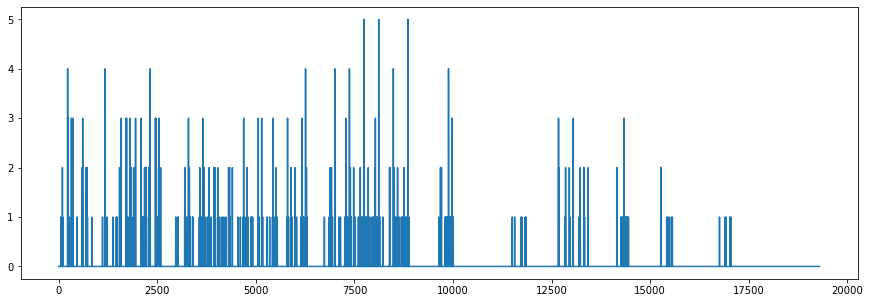

In [262]:
# lc2_daily.dfspot_count.plot()
# df.dfspot_count - df[f'dfs_count_{method}40']
# lc2_daily.dfs_count_daily40.plot()
# lc2_daily.ffs_count_daily40.plot()


(lc2_daily.dfspot_count - lc2_daily['dfs_count_daily40']).plot(figsize=(15,5))
# lc2_daily.dfspot_count.plot(figsize=(15,5))
# ax=lc2_daily.dfs_count_daily40.plot()

# ax=lc2_daily.dfs_count_daily40.cumsum().plot()
# lc2_daily.dfspot_count.cumsum().plot(figsize=(25,5))

ax.legend()
# ax.set_xlim(4000, 5000)

In [228]:
# len(lc2_daily.elevation.unique()) * 12
lc2_daily

,D,D_year,D_month,elevation,elevation_bin,id,dfs_count_daily20,dfs_count_daily30,dfs_count_daily40,dfspot_count,dfs_count_daily40_percent,dfs_count_daily30_percent,dfs_count_daily20_percent,ffs_count_daily40,ffs_count_daily30,ffs_count_daily20,ffs_count_daily40_percent,ffs_count_daily30_percent,ffs_count_daily20_percent
0,1990-08-31,1990,8,4485,4000 - 4500,4485_8,0.0,0.0,2.0,2.0,100.0,0.0,0.0,0.0,2.0,2.0,0.0,100.0,100.0
1,1990-09-30,1990,9,4485,4000 - 4500,4485_9,0.0,0.0,1.0,1.0,100.0,0.0,0.0,0.0,1.0,1.0,0.0,100.0,100.0
2,1990-10-31,1990,10,4485,4000 - 4500,4485_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1990-11-30,1990,11,4485,4000 - 4500,4485_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1990-12-31,1990,12,4485,4000 - 4500,4485_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19287,2021-02-28,2021,2,5936,5500 - 6000,5936_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19288,2021-03-31,2021,3,5936,5500 - 6000,5936_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19289,2021-04-30,2021,4,5936,5500 - 6000,5936_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19290,2021-05-31,2021,5,5936,5500 - 6000,5936_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:

# axlc2_daily[lc2_daily.ffs_count_daily40<0]

# once

In [231]:

once20_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once20_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once20_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover3.csv', index_col = 0).fillna(0)[:-1]#[:372]
once20_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

once30_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once30_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once30_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
once30_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

once40_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once40_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once40_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
once40_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover4.csv', index_col = 0).fillna(0)#[:372]


once20_lc1_melted = prepare_dfcount_for_plot(once20_lc1).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc2_melted = prepare_dfcount_for_plot(once20_lc2).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc3_melted = prepare_dfcount_for_plot(once20_lc3).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc4_melted = prepare_dfcount_for_plot(once20_lc4).rename(columns={'dfs_count': 'dfs_count_once20'})

once30_lc1_melted = prepare_dfcount_for_plot(once30_lc1).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc2_melted = prepare_dfcount_for_plot(once30_lc2).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc3_melted = prepare_dfcount_for_plot(once30_lc3).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc4_melted = prepare_dfcount_for_plot(once30_lc4).rename(columns={'dfs_count': 'dfs_count_once30'})

once40_lc1_melted = prepare_dfcount_for_plot(once40_lc1).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc2_melted = prepare_dfcount_for_plot(once40_lc2).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc3_melted = prepare_dfcount_for_plot(once40_lc3).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc4_melted = prepare_dfcount_for_plot(once40_lc4).rename(columns={'dfs_count': 'dfs_count_once40'})


In [232]:
# make 4 dfs depending ont he scenatio 
merge_on = ['D', 'D_year', 'D_month', 'elevation', 'elevation_bin']

# ------- landcover1
dfs = [once20_lc1_melted, once30_lc1_melted, once40_lc1_melted]

lc1_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc1_once = pd.merge(lc1_once, df[merge_on + [unique_col]], on=merge_on)
lc1_once['dfspot_count'] = dfspot1_melted.dfs_count

# ------- landcover2
dfs = [once20_lc2_melted, once30_lc2_melted, once40_lc2_melted]

lc2_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc2_once = pd.merge(lc2_once, df[merge_on + [unique_col]], on=merge_on)
lc2_once['dfspot_count'] = dfspot2_melted.dfs_count

# ------- landcover3
dfs = [once20_lc3_melted, once30_lc3_melted, once40_lc3_melted]

lc3_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc3_once = pd.merge(lc3_once, df[merge_on + [unique_col]], on=merge_on)
lc3_once['dfspot_count'] = dfspot3_melted.dfs_count


# ------- landcover4
dfs = [once20_lc4_melted, once30_lc4_melted, once40_lc4_melted]

lc4_once = dfs[0][merge_on + ['dfs_count_once20']]
# Iterate over the remaining dataframes (daily30, daily40) and merge them
for i, (df, label) in enumerate(zip(dfs[1:], [30, 40]), start=2):
    unique_col = f'dfs_count_once{label}'  # Adjust unique column name
    lc4_once = pd.merge(lc4_once, df[merge_on + [unique_col]], on=merge_on)
lc4_once['dfspot_count'] = dfspot4_melted.dfs_count


In [233]:
lc1_once = calculate_floods(lc1_once, 'once')
lc2_once = calculate_floods(lc2_once, 'once')
lc3_once = calculate_floods(lc3_once, 'once')
lc4_once = calculate_floods(lc4_once, 'once')


In [234]:
lc1_once.columns

Index(['D', 'D_year', 'D_month', 'elevation', 'elevation_bin',
       'dfs_count_once20', 'dfs_count_once30', 'dfs_count_once40',
       'dfspot_count', 'dfs_count_once40_percent', 'dfs_count_once30_percent',
       'dfs_count_once20_percent', 'ffs_count_once40', 'ffs_count_once30',
       'ffs_count_once20', 'ffs_count_once40_percent',
       'ffs_count_once30_percent', 'ffs_count_once20_percent'],
      dtype='object')

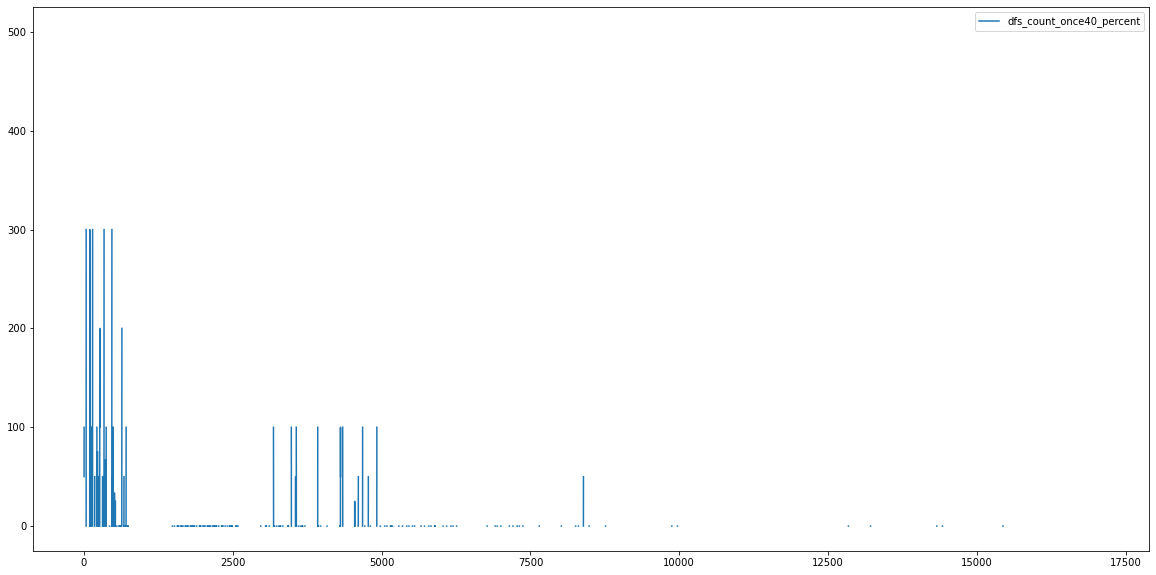

In [243]:
plt.figure(figsize = (20, 10))

# lc1_daily.dfspot_count.plot()
# lc1_daily.dfs_count_daily40.plot()
lc1_once.dfs_count_once40_percent.plot()

plt.legend()

<AxesSubplot:xlabel='dfspot_count', ylabel='dfs_count_daily20'>

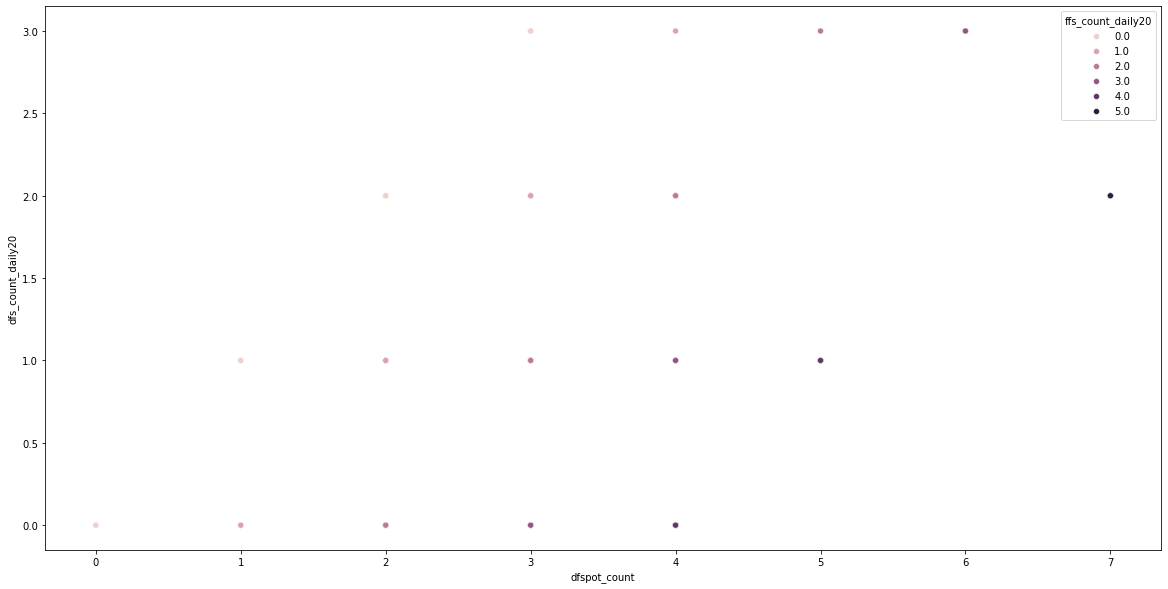

In [236]:
plt.figure(figsize = (20, 10))

sns.scatterplot(data=lc1_daily, x="dfspot_count", y="dfs_count_daily20", hue = 'ffs_count_daily20')
# lc1_daily.ffs_count_daily40.plot()
# lc1_daily.dfs_count_daily40.plot()
# lc1_daily.dfspot_count.plot()

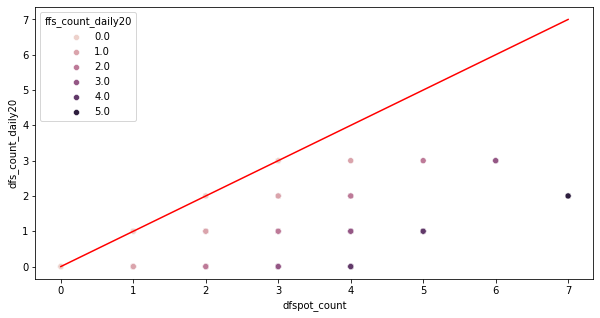

In [237]:
plt.figure(figsize = (10, 5))

test = lc1_daily
test['test'] = lc1_daily.dfs_count_daily20 + lc1_daily.ffs_count_daily20

sns.scatterplot(data=lc1_daily, x="dfspot_count", y="dfs_count_daily20", hue = 'ffs_count_daily20')
plt.plot([0, 7], [0, 7], color='red', label='1:1 line')
